In [367]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np


import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as pyplot

In [368]:
Top_Women = pd.read_csv("Women_TopTen_1999-2017.csv")

In [369]:
Top_Men = pd.read_csv("Men_TopTen_1999-2017.csv")

In [370]:
#Top Ten | all women
Top_Women.head()

,RANK,MARK,COMPETITOR,DOB,NAT,POS,VENUE,DATE1,DATE2
0,1,02:22:12,Eri YAMAGUGHI,1973,JPN,1,Tokyo,1999,1999
1,2,02:23:22,Joyce CHEPCHUMBA,1970,KEN,1,London,1999,1999
2,3,02:23:24,Lidia SIMON,1973,ROU,1,Osaka,1999,1999
3,4,02:23:25,Fatuma ROBA,1973,ETH,1,"Boston, MA",1999,1999
4,5,02:23:58,Marleen RENDERS,1968,BEL,2,Berlin,1999,1999


In [371]:
Top_Men.head()

,RANK,MARK,COMPETITOR,DOB,NAT,POS,VENUE,DATE1,DATE2
0,1,02:05:42,Khalid KHANNOUCHI,1971,MAR,1,"Chicago, IL",1999,1999
1,2,02:06:16,Moses TANUI,1965,KEN,2,"Chicago, IL",1999,1999
2,3,02:06:33,Gert THYS,1971,RSA,1,Tokyo,1999,1999
3,4,02:06:44,Josephat KIPRONO,1973,KEN,1,Berlin,1999,1999
4,5,02:06:47,Fred Kiprop KIPTUM,1974,KEN,1,Amsterdam,1999,1999


In [372]:
Top_Women = Top_Women.set_index('DATE2')
Top_Women.head()

,RANK,MARK,COMPETITOR,DOB,NAT,POS,VENUE,DATE1
DATE2,,,,,,,,
1999,1,02:22:12,Eri YAMAGUGHI,1973,JPN,1,Tokyo,1999
1999,2,02:23:22,Joyce CHEPCHUMBA,1970,KEN,1,London,1999
1999,3,02:23:24,Lidia SIMON,1973,ROU,1,Osaka,1999
1999,4,02:23:25,Fatuma ROBA,1973,ETH,1,"Boston, MA",1999
1999,5,02:23:58,Marleen RENDERS,1968,BEL,2,Berlin,1999


In [373]:
Top_Men = Top_Men.set_index('DATE2')
Top_Men.head()

,RANK,MARK,COMPETITOR,DOB,NAT,POS,VENUE,DATE1
DATE2,,,,,,,,
1999,1,02:05:42,Khalid KHANNOUCHI,1971,MAR,1,"Chicago, IL",1999
1999,2,02:06:16,Moses TANUI,1965,KEN,2,"Chicago, IL",1999
1999,3,02:06:33,Gert THYS,1971,RSA,1,Tokyo,1999
1999,4,02:06:44,Josephat KIPRONO,1973,KEN,1,Berlin,1999
1999,5,02:06:47,Fred Kiprop KIPTUM,1974,KEN,1,Amsterdam,1999


In [374]:
Top_Women.shape

(190, 8)

In [375]:
Top_Women.dtypes

RANK           int64
MARK          object
COMPETITOR    object
DOB            int64
NAT           object
POS           object
VENUE         object
DATE1          int64
dtype: object

# Creating a new Dataframe (incl. 3 new colomns)

New colomns: Difference | 30plus | 30minus

In [376]:
Top_Women['Difference'] = Top_Women['DATE1']-Top_Women['DOB']

In [377]:
Top_Men['Difference'] = Top_Men['DATE1']-Top_Men['DOB']

In [378]:
Top_Women.head()

,RANK,MARK,COMPETITOR,DOB,NAT,POS,VENUE,DATE1,Difference
DATE2,,,,,,,,,
1999,1,02:22:12,Eri YAMAGUGHI,1973,JPN,1,Tokyo,1999,26
1999,2,02:23:22,Joyce CHEPCHUMBA,1970,KEN,1,London,1999,29
1999,3,02:23:24,Lidia SIMON,1973,ROU,1,Osaka,1999,26
1999,4,02:23:25,Fatuma ROBA,1973,ETH,1,"Boston, MA",1999,26
1999,5,02:23:58,Marleen RENDERS,1968,BEL,2,Berlin,1999,31


In [391]:
Top_Men.dtypes

RANK           int64
MARK          object
COMPETITOR    object
DOB            int64
NAT           object
POS           object
VENUE         object
DATE1          int64
Difference     int64
dtype: object

In [379]:
Top_Men.head()

,RANK,MARK,COMPETITOR,DOB,NAT,POS,VENUE,DATE1,Difference
DATE2,,,,,,,,,
1999,1,02:05:42,Khalid KHANNOUCHI,1971,MAR,1,"Chicago, IL",1999,28
1999,2,02:06:16,Moses TANUI,1965,KEN,2,"Chicago, IL",1999,34
1999,3,02:06:33,Gert THYS,1971,RSA,1,Tokyo,1999,28
1999,4,02:06:44,Josephat KIPRONO,1973,KEN,1,Berlin,1999,26
1999,5,02:06:47,Fred Kiprop KIPTUM,1974,KEN,1,Amsterdam,1999,25


In [380]:
Top_Men['Difference'].mean()

27.952631578947368

In [381]:
Top_Women['Difference'].mean()

28.894736842105264

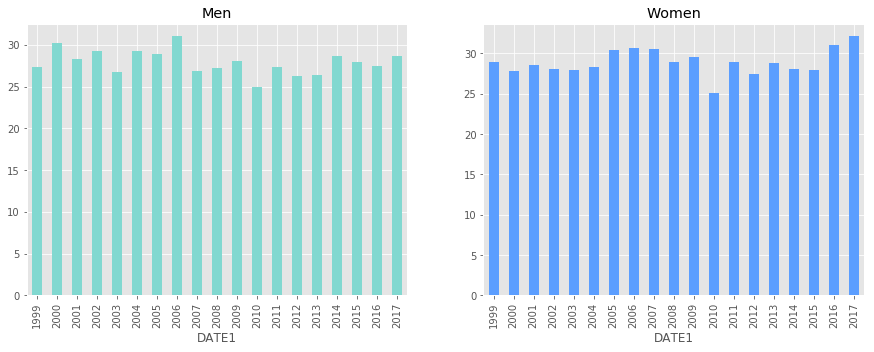

In [382]:
#TOP Men / TOP Women
fig = plt.figure()
ax = fig.add_subplot(121) # hoch/runter
ax2 = fig.add_subplot(122) # seitlich
Top_Men.groupby('DATE1').Difference.mean().plot(title='Men', color='#81D8D0', ax=ax, kind='bar', figsize=(15,5))
Top_Women.groupby('DATE1').Difference.mean().plot(title='Women', color='#5B9EFF' ,ax=ax2, kind='bar', figsize=(15,5))

#Top_Women.groupby('DATE1').Difference.mean().plot(kind='bar', color='black')

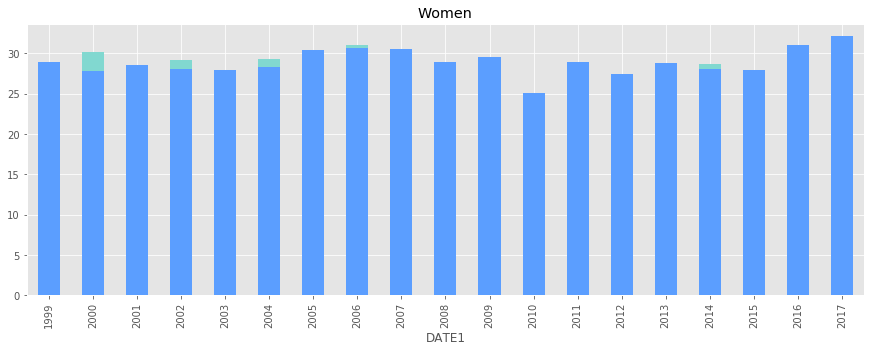

In [392]:
fig, ax = plt.subplots()

Top_Men.groupby('DATE1').Difference.mean().plot(title='Men', color='#81D8D0', ax=ax, kind='bar', figsize=(15,5))
Top_Women.groupby('DATE1').Difference.mean().plot(title='Women', color='#5B9EFF' ,ax=ax, kind='bar', figsize=(15,5))

plt.savefig("Age_Women.pdf")

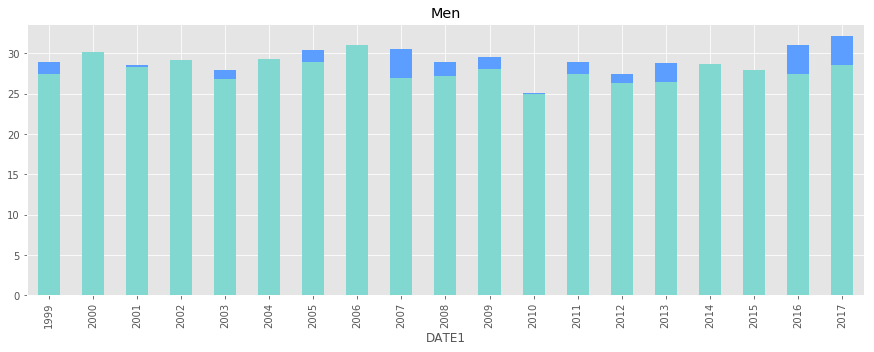

In [393]:
fig, ax = plt.subplots()

Top_Women.groupby('DATE1').Difference.mean().plot(title='Women', color='#5B9EFF' ,ax=ax, kind='bar', figsize=(15,5))
Top_Men.groupby('DATE1').Difference.mean().plot(title='Men', color='#81D8D0', ax=ax, kind='bar', figsize=(15,5))
plt.savefig("Age_Men.pdf")

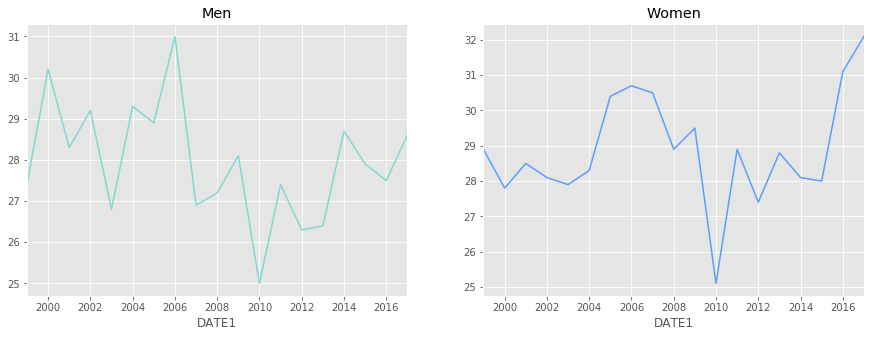

In [394]:
#TOP Men / TOP Women
fig = plt.figure()
ax = fig.add_subplot(121) # hoch/runter
ax2 = fig.add_subplot(122) # seitlich
Top_Men.groupby('DATE1').Difference.mean().plot(title='Men', color='#81D8D0', ax=ax, figsize=(15,5))
Top_Women.groupby('DATE1').Difference.mean().plot(title='Women', color='#5B9EFF' ,ax=ax2, figsize=(15,5))

plt.savefig("Age_Lines.pdf")
#Top_Women.groupby('DATE1').Difference.mean().plot(kind='bar', color='black')

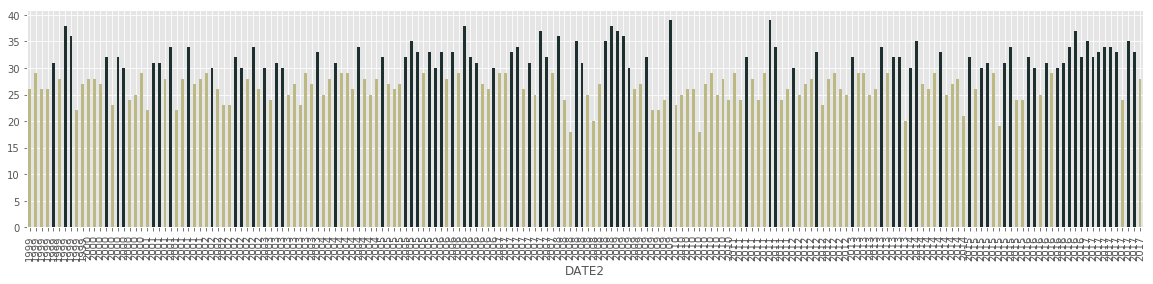

In [396]:
Top_Women['Difference'].plot(kind='bar', figsize=(20, 4), color=[colorlist])
plt.savefig("Age_Women_allYears.pdf")

In [ ]:
#colorlist

In [ ]:
#colors = {
#    True:'#1D302F',
#    False:'#bcb985'
#}
#colorlist = [colors[x] for x in Top_Women['30plus']]

#Top_Women['Difference'].plot(kind='bar', figsize=(20, 4), color=[colorlist])
#plt.xlabel('Age Development from 1999 to 2016', fontsize=15)
#plt.savefig("Top_Women_Difference_Color.pdf")

In [ ]:
Top_Women['30plus'] = Top_Women['Difference'] > 29

In [ ]:
Top_Women['30plus'].sum()

In [ ]:
Top_Women['30minus'] = Top_Women['Difference'] < 30

In [ ]:
Top_Women['30minus'].sum()

In [ ]:
Top_Women.head()

In [ ]:
Top_Women['30plus'].plot(kind='bar', color='#1D302F', figsize=(25,3))
Top_Women['30minus'].plot(kind='bar', color='#bcb985', figsize=(25,3))

plt.xlabel('1999', fontsize=15)
#plt.savefig("Top_Women.pdf")

# 1999

In [ ]:
Top_Women_1999 = Top_Women[Top_Women['DATE1'] == 1999]
Top_Women_1999

In [ ]:
Avg_1999 = Top_Women_1999['Difference'].mean()
Avg_1999

In [ ]:
#Top_Women_1999['Difference'].sort_values()

In [ ]:
Top_Women_1999['30plus'].plot(kind='bar', color='#1D302F', figsize=(5,3))
Top_Women_1999['30minus'].plot(kind='bar', color='#bcb985', figsize=(5,3))
plt.xlabel('1999', fontsize=15)
#plt.savefig("Top_10_1999.pdf")

# 2000

In [ ]:
Top_Women_2000 = Top_Women[Top_Women['DATE1'] == 2000]
Top_Women_2000

In [ ]:
Avg_2000 = Top_Women_2000['Difference'].mean()
Avg_2000

In [ ]:
Top_Women_2000['30plus'].plot(kind='bar', color='#1D302F', figsize=(5,3))
Top_Women_2000['30minus'].plot(kind='bar', color='#bcb985', figsize=(5,3))
plt.xlabel('2000', fontsize=15)
#plt.savefig("Top_10_2000.pdf")

# 2001

In [ ]:
Top_Women_2001 = Top_Women[Top_Women['DATE1'] == 2001]
Top_Women_2001

In [ ]:
Avg_2001 = Top_Women_2001['Difference'].mean()
Avg_2001

In [ ]:
Top_Women_2001['30plus'].plot(kind='bar', color='#1D302F', figsize=(5,3))
Top_Women_2001['30minus'].plot(kind='bar', color='#bcb985', figsize=(5,3))
plt.xlabel('2001', fontsize=15)
#plt.savefig("Top_10_2001.pdf")

# 2002

In [ ]:
Top_Women_2002 = Top_Women[Top_Women['DATE1'] == 2002]
Top_Women_2002.head(3)

In [ ]:
Avg_2002 = Top_Women_2002['Difference'].mean()
Avg_2002

In [ ]:
Top_Women_2002['30plus'].plot(kind='bar', color='#1D302F', figsize=(5,3))
Top_Women_2002['30minus'].plot(kind='bar', color='#bcb985', figsize=(5,3))
plt.xlabel('2002', fontsize=15)
#plt.savefig("Top_10_2002.pdf")

# 2003

In [ ]:
Top_Women_2003 = Top_Women[Top_Women['DATE1'] == 2003]
Top_Women_2003.head(3)

In [ ]:
Avg_2003 = Top_Women_2003['Difference'].mean()
Avg_2003

In [ ]:
Top_Women_2003['30plus'].plot(kind='bar', color='#1D302F', figsize=(5,3))
Top_Women_2003['30minus'].plot(kind='bar', color='#bcb985', figsize=(5,3))
plt.xlabel('2003', fontsize=15)
#plt.savefig("Top_10_2003.pdf")

In [ ]:
Top_Women_2003['30plus'].sum()


# 2004

In [ ]:
Top_Women_2004 = Top_Women[Top_Women['DATE1'] == 2004]
Top_Women_2004.head(3)

In [ ]:
Avg_2004 = Top_Women_2003['Difference'].mean()
Avg_2004

In [ ]:
Top_Women_2004['30plus'].plot(kind='bar', color='#1D302F', figsize=(5,3))
Top_Women_2004['30minus'].plot(kind='bar', color='#bcb985', figsize=(5,3))
plt.xlabel('2004', fontsize=15)
#plt.savefig("Top_10_2004.pdf")

In [ ]:
Top_Women_2004['30plus'].sum()


# 2005

In [ ]:
Top_Women_2005 = Top_Women[Top_Women['DATE1'] == 2005]
Top_Women_2005.head(3)

In [ ]:
Avg_2005 = Top_Women_2005['Difference'].mean()
Avg_2005

In [ ]:
Top_Women_2005['30plus'].plot(kind='bar', color='#1D302F', figsize=(5,3))
Top_Women_2005['30minus'].plot(kind='bar', color='#bcb985', figsize=(5,3))
plt.xlabel('2005', fontsize=15)
#plt.savefig("Top_10_2005.pdf")

In [ ]:
Top_Women_2005['30plus'].sum()

# 2006

In [ ]:
Top_Women_2006 = Top_Women[Top_Women['DATE1'] == 2006]
Top_Women_2006#.head(3)

In [ ]:
Avg_2006 = Top_Women_2006['Difference'].mean()
Avg_2006

In [ ]:
Top_Women_2006['30plus'].plot(kind='bar', color='#1D302F', figsize=(5,3))
Top_Women_2006['30minus'].plot(kind='bar', color='#bcb985', figsize=(5,3))
plt.xlabel('2006', fontsize=15)
#plt.savefig("Top_10_2006.pdf")

In [ ]:
Top_Women_2006['30plus'].sum()

# 2007

In [ ]:
Top_Women_2007 = Top_Women[Top_Women['DATE1'] == 2007]
Top_Women_2007#.head(3)

In [ ]:
Avg_2007 = Top_Women_2007['Difference'].mean()
Avg_2007

In [ ]:
Top_Women_2007['30plus'].plot(kind='bar', color='#1D302F', figsize=(5,3))
Top_Women_2007['30minus'].plot(kind='bar', color='#bcb985', figsize=(5,3))
plt.xlabel('2007', fontsize=15)
#plt.savefig("Top_10_2007.pdf")

In [ ]:
Top_Women_2007['30plus'].sum()

# 2008

In [ ]:
Top_Women_2008 = Top_Women[Top_Women['DATE1'] == 2008]
Top_Women_2008#.head(3)

In [ ]:
Avg_2008 = Top_Women_2008['Difference'].mean()
Avg_2008

In [ ]:
Top_Women_2008['30plus'].plot(kind='bar', color='#1D302F', figsize=(5,3))
Top_Women_2008['30minus'].plot(kind='bar', color='#bcb985', figsize=(5,3))
plt.xlabel('2008', fontsize=15)
#plt.savefig("Top_10_2008.pdf")

In [ ]:
Top_Women_2008['30plus'].sum()

# 2009

In [ ]:
Top_Women_2009 = Top_Women[Top_Women['DATE1'] == 2009]
Top_Women_2009#.head(3)

In [ ]:
Avg_2009 = Top_Women_2009['Difference'].mean()
Avg_2009

In [ ]:
Top_Women_2009['30plus'].plot(kind='bar', color='#1D302F', figsize=(5,3))
Top_Women_2009['30minus'].plot(kind='bar', color='#bcb985', figsize=(5,3))
plt.xlabel('2009', fontsize=15)
#plt.savefig("Top_10_2009.pdf")

In [ ]:
Top_Women_2009['30plus'].sum()

# 2010

In [ ]:
Top_Women_2010 = Top_Women[Top_Women['DATE1'] == 2010]
Top_Women_2010#.head(3)

In [ ]:
Avg_2010 = Top_Women_2010['Difference'].mean()
Avg_2010

In [ ]:
Top_Women_2010['30plus'].plot(kind='bar', color='#1D302F', figsize=(5,3))
Top_Women_2010['30minus'].plot(kind='bar', color='#bcb985', figsize=(5,3))
plt.xlabel('2010', fontsize=15)
#plt.savefig("Top_10_2010.pdf")

In [ ]:
Top_Women_2010['30plus'].sum()

# 2011

In [ ]:
Top_Women_2011 = Top_Women[Top_Women['DATE1'] == 2011]
Top_Women_2011#.head(3)

In [ ]:
Avg_2011 = Top_Women_2011['Difference'].mean()
Avg_2011

In [ ]:
Top_Women_2011['30plus'].plot(kind='bar', color='#1D302F', figsize=(5,3))
Top_Women_2011['30minus'].plot(kind='bar', color='#bcb985', figsize=(5,3))
plt.xlabel('2011', fontsize=15)
#plt.savefig("Top_10_2011.pdf")

In [ ]:
Top_Women_2011['30plus'].sum()

# 2012

In [ ]:
Top_Women_2012 = Top_Women[Top_Women['DATE1'] == 2012]
Top_Women_2012#.head(3)

In [ ]:
Avg_2012 = Top_Women_2012['Difference'].mean()
Avg_2012

In [ ]:
Top_Women_2012['30plus'].plot(kind='bar', color='#1D302F', figsize=(5,3))
Top_Women_2012['30minus'].plot(kind='bar', color='#bcb985', figsize=(5,3))
plt.xlabel('2012', fontsize=15)
plt.savefig("Top_10_2012.pdf")

In [ ]:
#Top_Women_2012['30plus'].sum()

# 2013

In [ ]:
Top_Women_2013 = Top_Women[Top_Women['DATE1'] == 2013]
Top_Women_2013#.head(3)

In [ ]:
Avg_2013 = Top_Women_2013['Difference'].mean()
Avg_2013

In [ ]:
Top_Women_2013['30plus'].plot(kind='bar', color='#1D302F', figsize=(5,3))
Top_Women_2013['30minus'].plot(kind='bar', color='#bcb985', figsize=(5,3))
plt.xlabel('2012', fontsize=15)
#plt.savefig("Top_10_2013.pdf")

In [ ]:
Top_Women_2013['30plus'].sum()

# 2014

In [ ]:
Top_Women_2014 = Top_Women[Top_Women['DATE1'] == 2014]
Top_Women_2014#.head(3)

In [ ]:
Avg_2014 = Top_Women_2014['Difference'].mean()
Avg_2014

In [ ]:
Top_Women_2014['30plus'].plot(kind='bar', color='#1D302F', figsize=(5,3))
Top_Women_2014['30minus'].plot(kind='bar', color='#bcb985', figsize=(5,3))
plt.xlabel('2014', fontsize=15)
#plt.savefig("Top_10_2014.pdf")

In [ ]:
Top_Women_2014['30plus'].sum()

# 2015

In [ ]:
Top_Women_2015 = Top_Women[Top_Women['DATE1'] == 2015]
Top_Women_2015#.head(3)

In [ ]:
Avg_2015 = Top_Women_2015['Difference'].mean()
Avg_2015

In [ ]:
Top_Women_2015['30plus'].plot(kind='bar', color='#1D302F', figsize=(5,3))
Top_Women_2015['30minus'].plot(kind='bar', color='#bcb985', figsize=(5,3))
plt.xlabel('2015', fontsize=15)
#plt.savefig("Top_10_2015.pdf")

In [ ]:
Top_Women_2015['30plus'].sum()

# 2016

In [ ]:
Top_Women_2016 = Top_Women[Top_Women['DATE1'] == 2016]
Top_Women_2016#.head(3)

In [ ]:
Avg_2016 = Top_Women_2016['Difference'].mean()
Avg_2016

In [ ]:
Top_Women_2016['30plus'].plot(kind='bar', color='#1D302F', figsize=(5,3))
Top_Women_2016['30minus'].plot(kind='bar', color='#bcb985', figsize=(5,3))
plt.xlabel('2016', fontsize=15)
#plt.savefig("Top_10_2016.pdf")

In [ ]:
Top_Women_2016['30plus'].sum()

# 2017

In [ ]:
Top_Women_2017 = Top_Women[Top_Women['DATE1'] == 2017]
Top_Women_2017#.head(3)

In [ ]:
Avg_2017 = Top_Women_2017['Difference'].mean()
Avg_2017

In [ ]:
Top_Women_2017['30plus'].plot(kind='bar', color='#1D302F', figsize=(5,3))
Top_Women_2017['30minus'].plot(kind='bar', color='#bcb985', figsize=(5,3))
plt.xlabel('2017', fontsize=15)
#ßplt.savefig("Top_10_2017.pdf")

In [ ]:
Top_Women_2016['30plus'].sum()

In [ ]:
#Um nur die Balken über 30 auszuwählen:
Top_Women_2003['30plus'].plot(kind='bar', color='#1D302F', figsize=(5,3))
plt.xlabel('2003', over 30, fontsize=15)

In [ ]:
# 1 row, 2 columns, and we'd like the second element.
ax1 = plt.subplot(1, 2, 1)
Top_Women_2000['30plus'].plot(kind='bar', color='#1D302F', figsize=(8, 3))
Top_Women_2000['30minus'].plot(kind='bar', color='#bcb985', figsize=(8, 3))
ax1.set_title("2000")

# 1 row, 2 columns, and we'd like the first element.
ax2 = plt.subplot(1, 2, 2)
Top_Women_2001['30plus'].plot(kind='bar', color='#1D302F', figsize=(8, 3))
Top_Women_2001['30minus'].plot(kind='bar', color='#bcb985', figsize=(8, 3))
ax2.set_title("2001")